**Patient-Analysis-Expenses : This is meant to find the relation between patients and their insurance cap.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
os.listdir()


['.ipynb_checkpoints',
 'Datasets',
 'Dipin_0102_Simple_Linear_Regression.ipynb',
 'House_Price_Prediction.ipynb',
 'Patient-Analysis-Expenses.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb']

In [3]:
os.listdir('Datasets')

['FuelConsumption.csv', 'House_Price_Prediction.csv', 'Insurance.csv']

In [4]:
data=pd.read_csv('Datasets\\Insurance.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [8]:
data.isnull().sum() # To check any missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.isna().sum()/len(data) # To check any missing values and output is in float

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

*The above commands are used to examine the dataset tables by user*

**Now Lets visualise the data by basic graphs between age and charges**

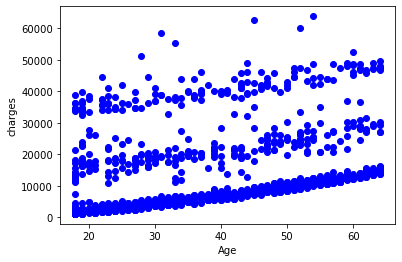

In [10]:
plt.scatter(data.age, data.charges, color='blue')

plt.xlabel('Age')
plt.ylabel('charges')
plt.show()

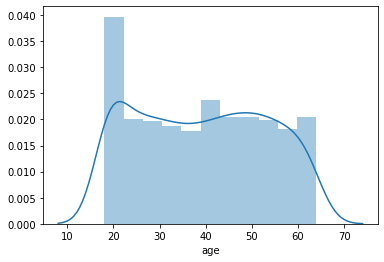

In [11]:
import seaborn as sns
sns.distplot(data.age)

*from the above two plots we can see the std.deviation for Age is not normalised, for a good dataset deivation can be from 0 to 1.5 Max acceptable. In order to make it normal we need to apply logarithm for datasets*

In [12]:
print(np.log(data.charges))

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: charges, Length: 1338, dtype: float64


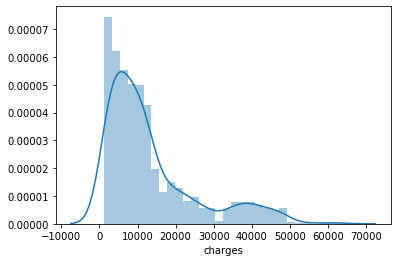

In [13]:
sns.distplot(data.charges)

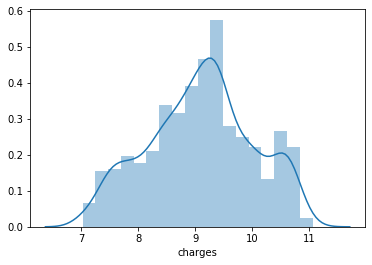

In [14]:
sns.distplot(np.log(data.charges))

*In the above two graphs we can see how the logarithm changes the values for a normalised dataset*

In [15]:
z=np.log(data.charges)


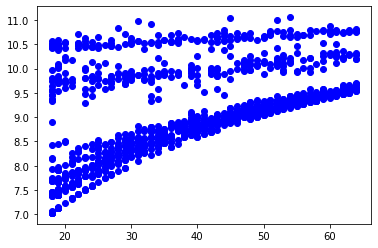

In [18]:
plt.scatter(data.age,z,color='blue')
plt.show()

**So, the next thing i suggest to group the values which have wide range. Here lets group data.age in to 3 based on the age values**

In [35]:
data['age_cat']=np.nan

In [36]:
one = [data]

In [37]:
one

[      age     sex     bmi  children smoker     region      charges  age_cat
 0      19  female  27.900         0    yes  southwest  16884.92400      NaN
 1      18    male  33.770         1     no  southeast   1725.55230      NaN
 2      28    male  33.000         3     no  southeast   4449.46200      NaN
 3      33    male  22.705         0     no  northwest  21984.47061      NaN
 4      32    male  28.880         0     no  northwest   3866.85520      NaN
 ...   ...     ...     ...       ...    ...        ...          ...      ...
 1333   50    male  30.970         3     no  northwest  10600.54830      NaN
 1334   18  female  31.920         0     no  northeast   2205.98080      NaN
 1335   18  female  36.850         0     no  southeast   1629.83350      NaN
 1336   21  female  25.800         0     no  southwest   2007.94500      NaN
 1337   61  female  29.070         0    yes  northwest  29141.36030      NaN
 
 [1338 rows x 8 columns]]

In [38]:
for col in one:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    

In [39]:
print(one)

[      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

           age_cat  
0      Young Adult  
1      Young Adult  
2      Young Adult  
3      Young Adult  
4      Young Adult  
...            ...  
1333  Senio

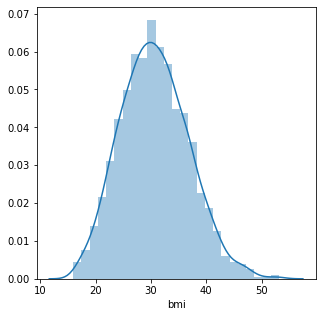

In [44]:
plt.figure(figsize=(5,5))
sns.distplot(data.bmi)
plt.show()

**Lets find the correlaion of charges with other factors, using heatmap**

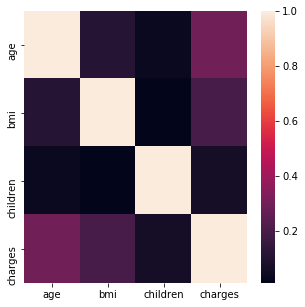

In [47]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())
plt.show()

In [48]:
print(data.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [49]:
young_adults = data["bmi"].loc[data["age_cat"] == "Young Adult"].values
senior_adult = data["bmi"].loc[data["age_cat"] == "Senior Adult"].values
elders = data["bmi"].loc[data["age_cat"] == "Elder"].values

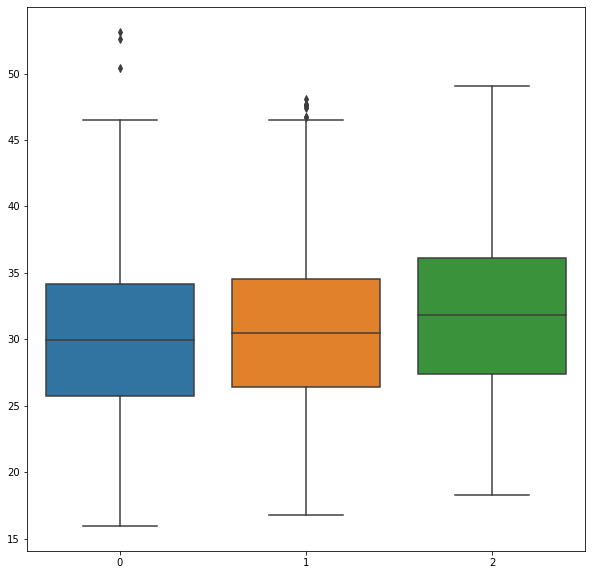

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(data= [young_adults, senior_adult, elders])

In [51]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
age_cat     1338 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 62.8+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
label=LabelEncoder()

In [59]:
data.sex=label.fit_transform(data.sex)

In [60]:
data.smoker=label.fit_transform(data.smoker)
data.region=label.fit_transform(data.region)

In [61]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,0,27.900,0,1,3,16884.92400,Young Adult
1,18,1,33.770,1,0,2,1725.55230,Young Adult
2,28,1,33.000,3,0,2,4449.46200,Young Adult
3,33,1,22.705,0,0,1,21984.47061,Young Adult
4,32,1,28.880,0,0,1,3866.85520,Young Adult


In [62]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
age_cat     1338 non-null object
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 62.8+ KB


In [64]:
data.age_cat = label.fit_transform(data.age_cat)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
age_cat     1338 non-null int32
dtypes: float64(2), int32(4), int64(2)
memory usage: 62.8 KB


In [66]:
data.head(20
         )

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,2
2,28,1,33.000,3,0,2,4449.46200,2
3,33,1,22.705,0,0,1,21984.47061,2
4,32,1,28.880,0,0,1,3866.85520,2
5,31,0,25.740,0,0,2,3756.62160,2
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,1
8,37,1,29.830,2,0,0,6406.41070,1
9,60,0,25.840,0,0,1,28923.13692,0


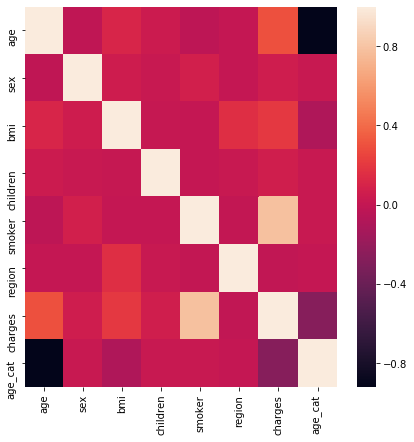

In [69]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr())
plt.show()

 **Ohh My God !! All smokers are gonna die soon, and will get bankerupted before that ;)**

*Lets see the variation of insurance between smoker and non smoker*

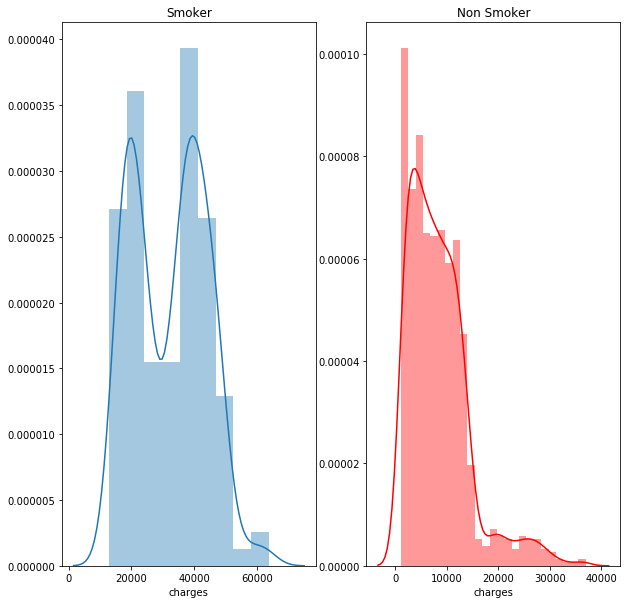

In [79]:
f= plt.figure(figsize=(10,10))

ax=f.add_subplot(121)
sns.distplot(data.loc[(data.smoker==1)].charges, ax=ax)
ax.set_title('Smoker')

ax=f.add_subplot(122)
sns.distplot(data.loc[(data.smoker==0)].charges, color='r', ax=ax)
ax.set_title('Non Smoker')

plt.show()

* As per the graph above, Smoking People spend much amount for treatments